<a href="https://colab.research.google.com/github/Eugeneantientropy/ML100Days/blob/main/HW_Day_79.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import keras


In [33]:
train, test = keras.datasets.cifar10.load_data()

In [34]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [35]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [39]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [40]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer2 (Dense)                │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer3 (Dense)                │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
## 超參數設定
LEARNING_RATE = 0.000001
EPOCHS = 5
BATCH_SIZE = 256

In [42]:
# compile the model and train it
optimizer = keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum = 0.999, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
training_history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    shuffle=True)

# now access the training history
results = {}
results['loss'] = training_history.history['loss']
results['val_loss'] = training_history.history['val_loss']
results['acc'] = training_history.history['accuracy']
results['val_acc'] = training_history.history['val_accuracy']
results



Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_24']
Received: inputs=Tensor(shape=(None, 3072))
  warnings.warn(msg)


196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.1078 - loss: 2.3402 - val_accuracy: 0.1204 - val_loss: 2.3133
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.1256 - loss: 2.3026 - val_accuracy: 0.1471 - val_loss: 2.2776
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.1533 - loss: 2.2696 - val_accuracy: 0.1680 - val_loss: 2.2514
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.1756 - loss: 2.2433 - val_accuracy: 0.1978 - val_loss: 2.2232
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.2047 - loss: 2.2160 - val_accuracy: 0.2125 - val_loss: 2.1984


{'loss': [2.3338537216186523,
  2.2934980392456055,
  2.2643520832061768,
  2.237363815307617,
  2.2109127044677734],
 'val_loss': [2.3133296966552734,
  2.2776150703430176,
  2.2513506412506104,
  2.2232110500335693,
  2.1984457969665527],
 'acc': [0.10859999805688858,
  0.13415999710559845,
  0.15602000057697296,
  0.18053999543190002,
  0.20825999975204468],
 'val_acc': [0.12039999663829803,
  0.14710000157356262,
  0.1679999977350235,
  0.19779999554157257,
  0.21250000596046448]}

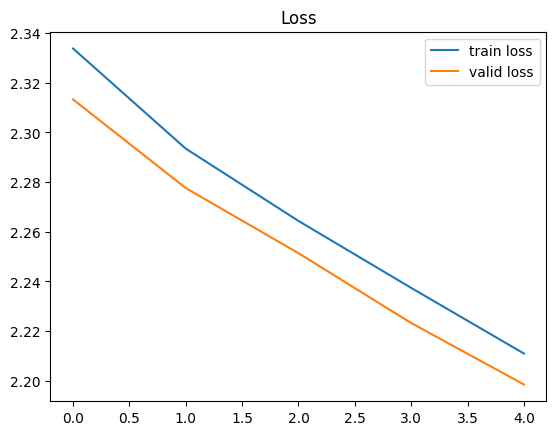

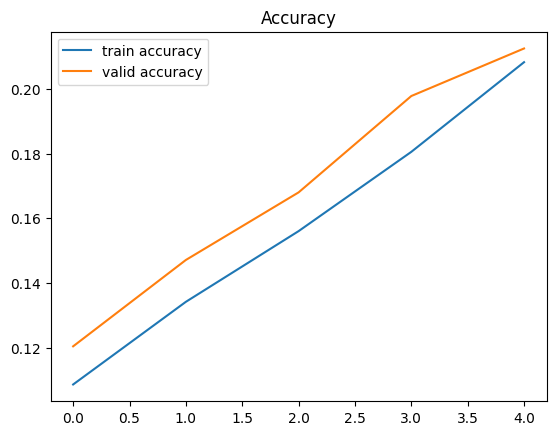

In [43]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()